# Quantized inverse dynamic for  Go -Explore

In [12]:
import gym
import gym_robotics
from stable_baselines3 import SAC
from lge import LatentGoExplore

env = gym.make("__root__/FetchNoTask-v1", image_obs_space=False)

n = 30_000
lge = LatentGoExplore(
    SAC,
    env,
    latent_size=4,
    distance_threshold=0.5,
    p=0.2,
    model_kwargs=dict(buffer_size=n),
    verbose=1,
)

Using cuda device


In [13]:
lge.explore(n)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.2     |
|    ep_rew_mean     | -37.5    |
|    success_rate    | 0.25     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 464      |
|    time_elapsed    | 0        |
|    total_timesteps | 181      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.5     |
|    ep_rew_mean     | -25      |
|    success_rate    | 0.5      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 450      |
|    time_elapsed    | 0        |
|    total_timesteps | 324      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.1     |
|    ep_rew_mean     | -28.4    |
|    success_rate    | 0.5      |
| time/              |          |
|    episodes        | 12       |
|    fps      

In [14]:
lge.archive.recompute_embeddings()

In [36]:
import numpy as np

archive = lge.archive
observations = archive.next_observations["observation"].reshape(n, -1)
embeddings = archive.next_embeddings[:n].reshape(n, -1)
sorted_density = archive.sorted_density[:n]
_, inverse = np.unique(sorted_density, return_index=True)
p = (1 - lge.archive.p) ** (np.arange(n) - 1) * lge.archive.p
w = p[inverse]
density = archive.density[:n]

In [32]:
color.argmax()

9899

Render the latent space and the observation space to see the cells.

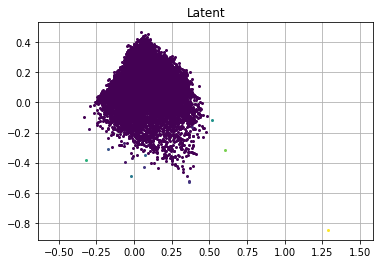

In [37]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap()
color = w / w.max()

fig, axs = plt.subplots(1, 1)

# Quantized latent
axs.grid()
axs.set_title("Latent")
axs.axis("equal")
for i in range(n):
    axs.plot(*embeddings[:, 0:2][i].T, "o", c=cmap(color[i]), markersize=2)

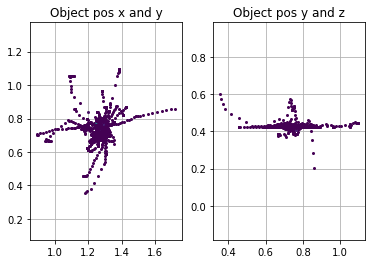

In [38]:
fig, axs = plt.subplots(1, 2)

# Quantized latent
axs[0].grid()
axs[0].set_title("Object pos x and y")
axs[0].axis("equal")
axs[1].grid()
axs[1].set_title("Object pos y and z")
axs[1].axis("equal")

for i in range(n):
    axs[0].plot(*observations[i, 8:10].T, "o", c=cmap(color[i]), markersize=2)
    axs[1].plot(*observations[i, 9:11].T, "o", c=cmap(color[i]), markersize=2)

In [18]:
print(lge.archive.next_observations["observation"][:, 0, 10].max())

0.59805703


Test wether the inverse model is accurate.

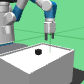

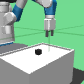

true action		 tensor([[-0.3094,  0.2850,  0.9634, -0.8120]])
predicted action	 tensor([[-0.0734,  0.3593,  1.0768, -0.1395]], grad_fn=<AddmmBackward0>)


In [ ]:
# Sample one transition
sample = go_explore.archive.sample(1)
observations = sample.observations["observation"] / 255
next_observations = sample.next_observations["observation"] / 255
actions = sample.actions

# Predict the action
go_explore.archive.inverse_model.eval()
pred_actions = go_explore.archive.inverse_model(observations, next_observations)

# See the result
display(Image.fromarray(sample.observations["observation"].squeeze().moveaxis(0, 2).detach().cpu().numpy()))
display(Image.fromarray(sample.next_observations["observation"].squeeze().moveaxis(0, 2).detach().cpu().numpy()))
# print("observation\t\t", observations)
# print("next observation\t", next_observations)
print("true action\t\t", actions)
print("predicted action\t", pred_actions)